## In this note book, we would like to present our solution for the following problem: 
#### Does the dishwasher in a specified order fits or not? 

In [1]:
#Importing the required libraries 
import json
import pandas as pd
import os

In [2]:
path = r"C:\BUas\DKG Challenge\combined data"

data = []

# Loop through all files in the directory
for file in os.listdir(path):
    if file.endswith(".json"):
        filepath = os.path.join(path, file) 

        with open(filepath, "r", encoding="UTF-8") as f:
            json_data = json.load(f)

            # Initialize the order dictionary
            order = {
                "Filename": file,
                "Dishwasher": "No",
                "Front": "No",
                "Output_Category": None,
                "Output_PosNr": None,
                "Output_Parameter": None,
                "Output_Opmerking": None
            }

            
            output = json_data.get("output", [])

            if len(output) >= 2:  
                o_values = output[1]

            if isinstance(o_values, list) and len(o_values) >= 4:  
                order.update({
                    "Output_Category": o_values[0],
                    "Output_PosNr": o_values[3],
                    "Output_Parameter": o_values[2],
                    "Output_Opmerking": o_values[1]
        })
            else:
                print("Unexpected format for o_values:", o_values)      

        
            dishwasher = 0
            front = 0

            posities = json_data.get("input", {}).get("Posities", [])

            #Searching for the dishwashers in the different order
            for positie in posities:
                if positie.get("ProductGroep") == "030601":
                    dishwasher += 1
                    order.update({
                        "Dishwasher": "Yes",
                        "Dishwasher_PosNr": positie.get("PosNr"),
                        "Dishwasher_ArtikelNr": positie.get("ArtikelNr"),
                        "Dishwasher_Omschrijving": positie.get("Omschrijving"),
                        "Dishwasher_Breedte": positie.get("Breedte"),
                        "Dishwasher_Hoogte": positie.get("Hoogte"),
                        "Dishwasher_Diepte": positie.get("Diepte"),
                        "Dishwasher_Abs_r": positie.get("Abs_r"),
                        "Dishwasher_Type": positie.get("Type"),
                        "Dishwasher_Serie": positie.get("Serie"),
                        "Dishwasher_ProductGroep": positie.get("ProductGroep"),
                        "Dishwasher_Coordinaten": positie.get("Coordinaten"),
                        "Dishwasher_MinZ": positie.get("MinZ"),
                        "Dishwasher_MaxZ": positie.get("MaxZ"),
                        "Dishwasher_min_plint": positie.get("min_plint"),
                        "Dishwasher_hoogte_adjust": positie.get("hoogte_adjust"),
                        "Dishwasher_hoogte": positie.get("hoogte"),
                        "Dishwasher_breedte": positie.get("breedte"),
                        "Dishwasher_deurhoogte": positie.get("deurhoogte"),
                        "Dishwasher_max_gewicht": positie.get("max_gewicht"),
                        "Dishwasher_sleepdeur": positie.get("sleepdeur"),
                    })
                # Searching for the fronts in the orders
                if positie.get("Type") == "Vaatwasserfront":
                    front += 1
                    order.update({
                        "Front": "Yes",
                        "Front_PosNr": positie.get("PosNr"),
                        "Front_ArtikelNr": positie.get("ArtikelNr"),
                        "Front_Omschrijving": positie.get("Omschrijving"),
                        "Front_Breedte": positie.get("Breedte"),
                        "Front_Hoogte": positie.get("Hoogte"),
                        "Front_Diepte": positie.get("Diepte"),
                        "Front_DefinitieveBreedte": positie.get("DefinitieveBreedte"),
                        "Front_DefinitieveDiepte": positie.get("DefinitieveDiepte"),
                        "Front_Dikte": positie.get("Dikte"),
                        "Front_Abs_r": positie.get("Abs_r"),
                        "Front_Type": positie.get("Type"),
                        "Front_Serie": positie.get("Serie"),
                        "Front_Coordinaten": positie.get("Coordinaten"),
                        "Front_MinZ": positie.get("MinZ"),
                        "Front_MaxZ": positie.get("MaxZ")
                    })

            # Skip files with multiple dishwashers, fronts, or none of them
            if dishwasher > 1 or front > 1 or (dishwasher == 0 and front == 0):
                continue

            data.append(order)

# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv("final_data.csv", index=False)

In [3]:
df.columns

Index(['Filename', 'Dishwasher', 'Front', 'Output_Category', 'Output_PosNr',
       'Output_Parameter', 'Output_Opmerking', 'Front_PosNr',
       'Front_ArtikelNr', 'Front_Omschrijving', 'Front_Breedte',
       'Front_Hoogte', 'Front_Diepte', 'Front_DefinitieveBreedte',
       'Front_DefinitieveDiepte', 'Front_Dikte', 'Front_Abs_r', 'Front_Type',
       'Front_Serie', 'Front_Coordinaten', 'Front_MinZ', 'Front_MaxZ',
       'Dishwasher_PosNr', 'Dishwasher_ArtikelNr', 'Dishwasher_Omschrijving',
       'Dishwasher_Breedte', 'Dishwasher_Hoogte', 'Dishwasher_Diepte',
       'Dishwasher_Abs_r', 'Dishwasher_Type', 'Dishwasher_Serie',
       'Dishwasher_ProductGroep', 'Dishwasher_Coordinaten', 'Dishwasher_MinZ',
       'Dishwasher_MaxZ', 'Dishwasher_min_plint', 'Dishwasher_hoogte_adjust',
       'Dishwasher_hoogte', 'Dishwasher_breedte', 'Dishwasher_deurhoogte',
       'Dishwasher_max_gewicht', 'Dishwasher_sleepdeur'],
      dtype='object')

C:\Users\pinte\AppData\Local\Temp\ipykernel_30408\3508904634.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values.index, y=values.values, ax=axes[i], palette="viridis")
C:\Users\pinte\AppData\Local\Temp\ipykernel_30408\3508904634.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values.index, y=values.values, ax=axes[i], palette="viridis")
C:\Users\pinte\AppData\Local\Temp\ipykernel_30408\3508904634.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values.index, y=values.values, ax=axes[i], palette="viridis")
C:\Users\pint

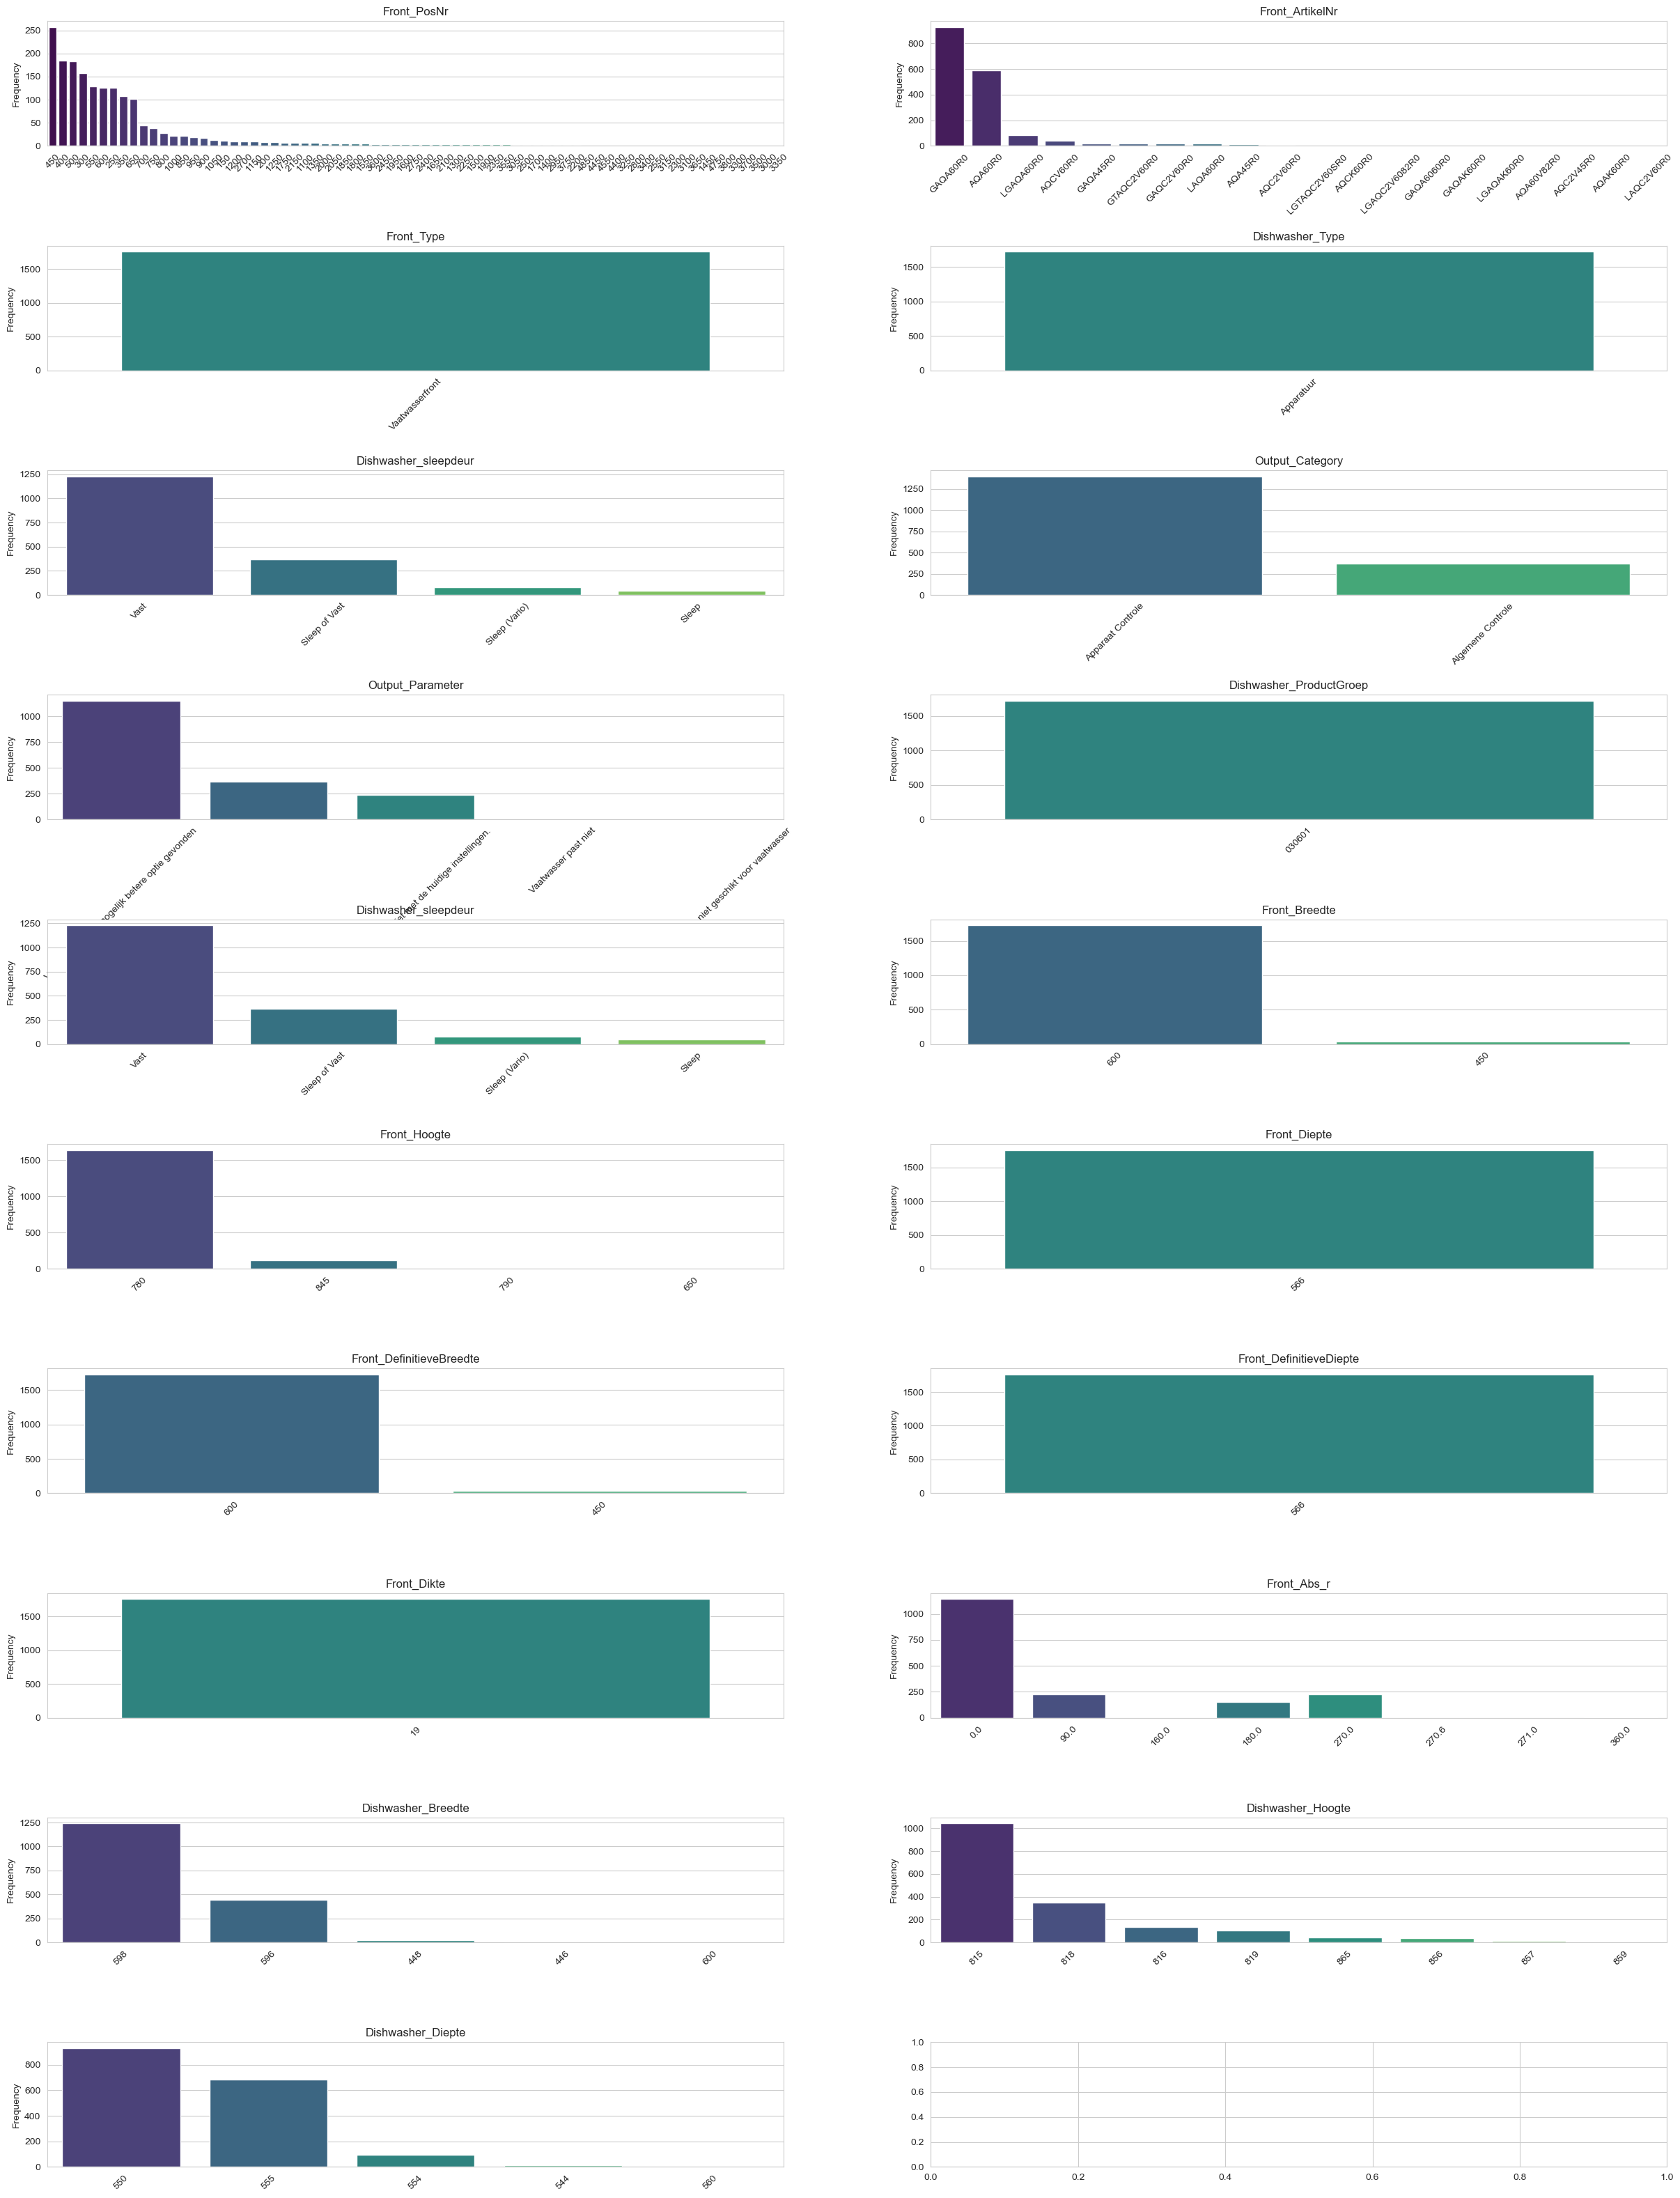

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

features = [
    "Front_PosNr", "Front_ArtikelNr", "Front_Type", "Dishwasher_Type", "Dishwasher_sleepdeur",
    "Output_Category", "Output_Parameter", "Dishwasher_ProductGroep", "Dishwasher_sleepdeur",
    "Front_Breedte", "Front_Hoogte", "Front_Diepte", "Front_DefinitieveBreedte",
    "Front_DefinitieveDiepte", "Front_Dikte", "Front_Abs_r", "Dishwasher_Breedte",
    "Dishwasher_Hoogte", "Dishwasher_Diepte"
]

fig, axes = plt.subplots(10, 2, figsize=(30, 40))  
axes = axes.flatten()  

for i, feature in enumerate(features):
    values = df[feature].value_counts()
    
    sns.barplot(x=values.index, y=values.values, ax=axes[i], palette="viridis")

    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.8, wspace=0.2) 
plt.show()

## Chechking missing values


In [5]:
metadata = df.dtypes.to_frame("data type")
metadata["missing"] = df.isnull().sum() + (df == "").sum()
metadata["missing percent"] = df.isnull().sum() + (df == "").sum() / df.shape[0]
metadata = metadata.reset_index(names="features")
metadata

,features,data type,missing,missing percent
0,Filename,object,0,0.000000
1,Dishwasher,object,0,0.000000
2,Front,object,0,0.000000
3,Output_Category,object,0,0.000000
4,Output_PosNr,object,368,0.208263
5,Output_Parameter,object,368,0.208263
6,Output_Opmerking,object,0,0.000000
7,Front_PosNr,object,8,8.000000
8,Front_ArtikelNr,object,8,8.000000
9,Front_Omschrijving,object,8,8.000000


In [6]:
# Dropping the unnecessary columns

features_to_drop = ["Filename", "Output_PosNr", "Front_Omschrijving", "Front_Coordinaten", 
                    "Dishwasher_ArtikelNr", "Dishwasher_Omschrijving", "Dishwasher_Type", 
                    "Front_Type", "Front_Coordinaten", "Dishwasher_Coordinaten", "Dishwasher", 
                    "Front", "Dishwasher_ProductGroep", "Front_PosNr", "Front_Diepte", "Front_DefinitieveDiepte", 
                    "Front_Dikte", "Dishwasher_PosNr"]
df = df.drop(columns=features_to_drop)


## Feature engineering




In [7]:
#Creating a new additional column to indicate if a dishwasher fits or not.

df["Output_Opmerking_binary"] = df["Output_Opmerking"].apply(lambda x: 1 if pd.isna(x) or x == "Geen opmerkingen." else 0)
opmerking = df["Output_Opmerking_binary"].value_counts()

### On the following chart, you can notice that there is a high class inbalance in the dataset.

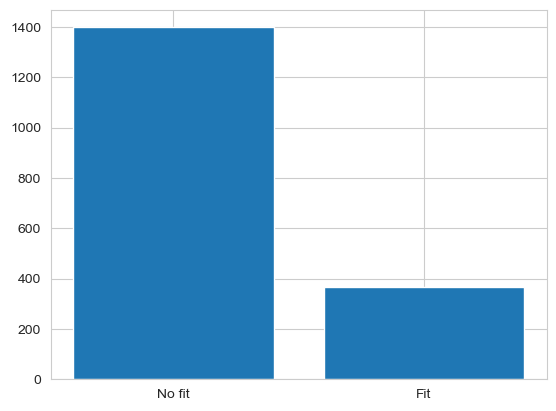

In [8]:
labels = {1: "Fit", 0: "No fit"}
opmerking.index = opmerking.index.map(labels)

plt.bar(opmerking.index, opmerking.values)
plt.show()

In [9]:
#Dropping the Output_Opmerking column since we are not using it anymore
feature_to_drop = ["Output_Opmerking"]
df = df.drop(columns=feature_to_drop)
df.head()


,Output_Category,Output_Parameter,Front_ArtikelNr,Front_Breedte,Front_Hoogte,Front_DefinitieveBreedte,Front_Abs_r,Front_Serie,Front_MinZ,Front_MaxZ,...,Dishwasher_MinZ,Dishwasher_MaxZ,Dishwasher_min_plint,Dishwasher_hoogte_adjust,Dishwasher_hoogte,Dishwasher_breedte,Dishwasher_deurhoogte,Dishwasher_max_gewicht,Dishwasher_sleepdeur,Output_Opmerking_binary
0,Apparaat Controle,"Vaatwasser past, mogelijk betere optie gevonden",GAQA60R0,600,780,600,90.0,2,133.0,910.0,...,95.0,910.0,90.0,60.0,815.0,598.0,650.0,8.5,Vast,0
1,Apparaat Controle,"Vaatwasser past, mogelijk betere optie gevonden",GAQA60R0,600,780,600,0.0,2,133.0,910.0,...,95.0,910.0,90.0,60.0,815.0,598.0,650.0,8.5,Vast,0
2,Algemene Controle,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.0,898.0,20.0,50.0,860.0,600.0,740.0,8.0,Sleep,1
3,Apparaat Controle,"Vaatwasser past, mogelijk betere optie gevonden",LAQA60R0,600,845,600,0.0,1,103.0,945.0,...,130.0,945.0,90.0,60.0,815.0,598.0,650.0,8.5,Vast,0
4,Algemene Controle,,GAQA60R0,600,780,600,90.0,2,133.0,910.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### Encoding the categorical features 

In [10]:
from sklearn.preprocessing import LabelEncoder

features_to_encode = ["Dishwasher_sleepdeur", "Output_Category", "Output_Parameter"]
df = pd.get_dummies(df, columns=features_to_encode, drop_first=True)

encoder = LabelEncoder()
df["Front_ArtikelNr"] = encoder.fit_transform(df["Front_ArtikelNr"])
columns_to_convert = [
    "Dishwasher_sleepdeur_Sleep (Vario)", "Dishwasher_sleepdeur_Sleep of Vast", "Dishwasher_sleepdeur_Vast", "Output_Category_Apparaat Controle", "Output_Parameter_Ingestelde plinthoogte niet geschikt voor vaatwasser", "Output_Parameter_Vaatwasser past niet", "Output_Parameter_Vaatwasser past niet met de huidige instellingen.","Output_Parameter_Vaatwasser past, mogelijk betere optie gevonden"
]
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [11]:
df.head()

,Front_ArtikelNr,Front_Breedte,Front_Hoogte,Front_DefinitieveBreedte,Front_Abs_r,Front_Serie,Front_MinZ,Front_MaxZ,Dishwasher_Breedte,Dishwasher_Hoogte,...,Dishwasher_max_gewicht,Output_Opmerking_binary,Dishwasher_sleepdeur_Sleep (Vario),Dishwasher_sleepdeur_Sleep of Vast,Dishwasher_sleepdeur_Vast,Output_Category_Apparaat Controle,Output_Parameter_Ingestelde plinthoogte niet geschikt voor vaatwasser,Output_Parameter_Vaatwasser past niet,Output_Parameter_Vaatwasser past niet met de huidige instellingen.,"Output_Parameter_Vaatwasser past, mogelijk betere optie gevonden"
0,10,600,780,600,90.0,2,133.0,910.0,598,815,...,8.5,0,0,0,1,1,0,0,0,1
1,10,600,780,600,0.0,2,133.0,910.0,598,815,...,8.5,0,0,0,1,1,0,0,0,1
2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598,856,...,8.0,1,0,0,0,0,0,0,0,0
3,14,600,845,600,0.0,1,103.0,945.0,598,815,...,8.5,0,0,0,1,1,0,0,0,1
4,10,600,780,600,90.0,2,133.0,910.0,NaN,NaN,...,NaN,1,0,0,0,0,0,0,0,0


### Visualzing Meta data 

In [12]:
metadata = df.dtypes.to_frame("data type")
metadata["missing"] = df.isnull().sum() + (df == "").sum()
metadata["missing percent"] = (df.isnull().sum() + (df == "").sum()) / df.shape[0] * 100  
metadata = metadata.reset_index(names="features")
metadata


,features,data type,missing,missing percent
0,Front_ArtikelNr,int32,0,0.000000
1,Front_Breedte,object,8,0.452745
2,Front_Hoogte,object,8,0.452745
3,Front_DefinitieveBreedte,object,8,0.452745
4,Front_Abs_r,float64,8,0.452745
5,Front_Serie,object,8,0.452745
6,Front_MinZ,float64,8,0.452745
7,Front_MaxZ,float64,8,0.452745
8,Dishwasher_Breedte,object,44,2.490096
9,Dishwasher_Hoogte,object,44,2.490096


In [13]:
features_to_numerical = ["Front_Breedte", "Front_Hoogte", "Front_DefinitieveBreedte", 
                         "Front_Serie","Dishwasher_Breedte", "Dishwasher_Hoogte", 
                         "Dishwasher_Diepte", "Dishwasher_Serie"]

df[features_to_numerical] = df[features_to_numerical].apply(pd.to_numeric, errors='coerce')

### Dropping the missing values 

In [14]:
df = df.dropna()
df.to_csv("final_data2.csv", index=False)

## Selecting and building the best model



#### We have choosen the KNN classifier model, since it preformed the best out of all options.

In [15]:
#Splitting the data to train and test the model.
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Output_Opmerking_binary"])
y = df["Output_Opmerking_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Calculating the feature importance using the Random Forest model

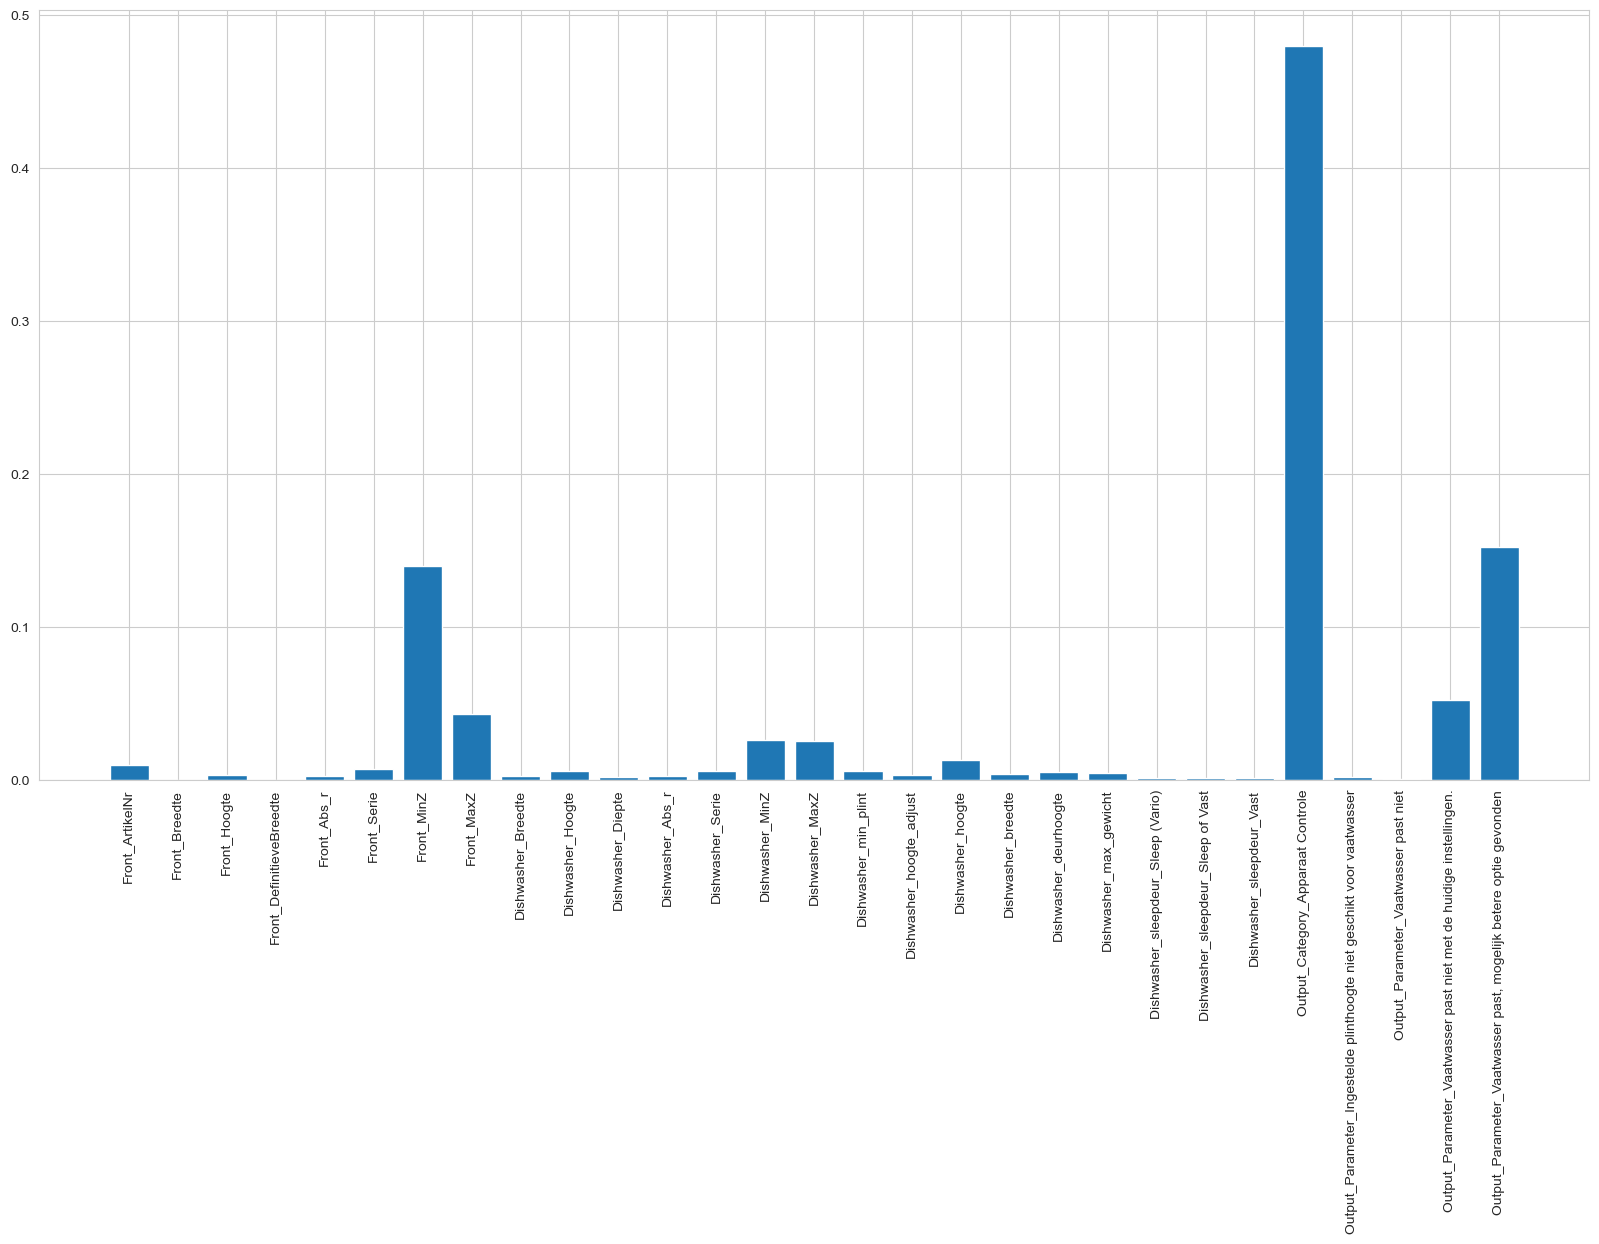

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

importances = rfc.feature_importances_
importance_df = pd.DataFrame({"features": X_train.columns})
importance_df["importance"] = importances

# Plot feature importance
plt.figure(figsize=(20, 10))
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.bar(range(X_train.shape[1]), importances)
plt.show()

In [17]:
# Selecting the top 10 features to train the model

top_10_features = importance_df.sort_values(by="importance", ascending=False).head(10)
top_features = top_10_features["features"]
print(top_features)

X = df[top_features]
y = df["Output_Opmerking_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

24                    Output_Category_Apparaat Controle
28    Output_Parameter_Vaatwasser past, mogelijk bet...
6                                            Front_MinZ
27    Output_Parameter_Vaatwasser past niet met de h...
7                                            Front_MaxZ
13                                      Dishwasher_MinZ
14                                      Dishwasher_MaxZ
17                                    Dishwasher_hoogte
0                                       Front_ArtikelNr
5                                           Front_Serie
Name: features, dtype: object


### Building the KNN classifier model


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights="distance")

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

kn_accuracy = accuracy_score(y_test, y_pred_knn)
kn_recall = recall_score(y_test, y_pred_knn)
kn_f1 = f1_score(y_test, y_pred_knn)
kn_precision = precision_score(y_test, y_pred_knn)
kn_roc_auc = roc_auc_score(y_test, y_pred_knn)

print(f"Accuracy: {kn_accuracy}")
print(f"Precision: {kn_precision}")
print(f"Recall: {kn_recall}")
print(f"F1: {kn_f1}")
print(f"RocAuc: {kn_roc_auc}")

Accuracy: 0.974757281553398
Precision: 0.9270833333333334
Recall: 0.9368421052631579
F1: 0.9319371727748691
RocAuc: 0.9600877192982455


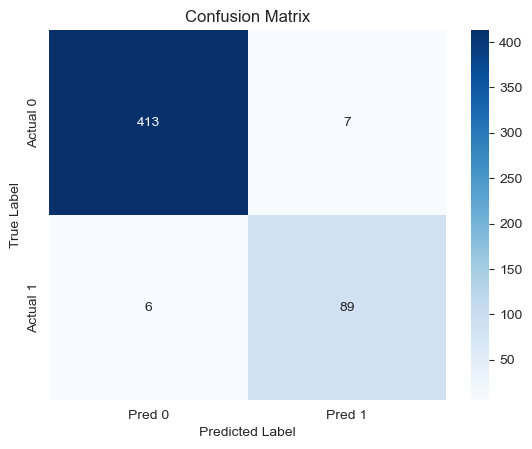

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

C:\Users\pinte\AppData\Local\Temp\ipykernel_30408\2588171164.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


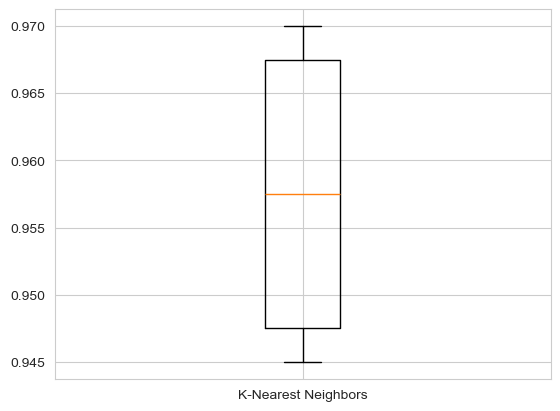

K-Nearest Neighbors Test Set Accuracy: 0.9553398058252427


In [20]:
from sklearn.model_selection import KFold, cross_val_score

models = {"K-Nearest Neighbors": KNeighborsClassifier()}
results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name} Test Set Accuracy: {test_score}")

### Hyperparameter tuning


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Example of parameters to search
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN model
knn = KNeighborsClassifier()

# Grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


C:\Users\pinte\AppData\Local\Temp\ipykernel_30408\648600398.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


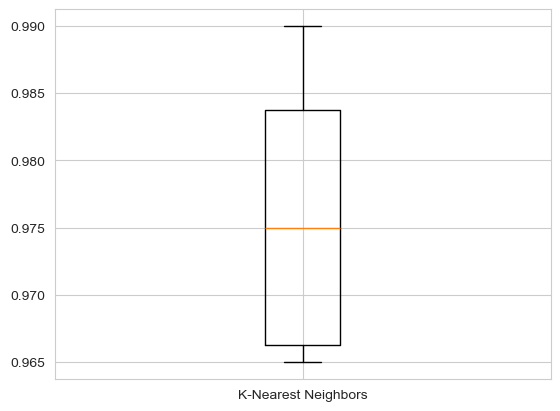

K-Nearest Neighbors Test Set Accuracy: 0.974757281553398


In [22]:
from sklearn.model_selection import KFold, cross_val_score

models = {"K-Nearest Neighbors": KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights="distance")}
results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name} Test Set Accuracy: {test_score}")